# Parte 2: Reconocimiento de imagenes mediante CNN
## Álvaro Andrés Esquivel Gómez 11002822

### Planteamiento del problema
Este conjunto de datos contiene 4242 imágenes de flores. La recopilación de datos se basa en el archivo de datos, imágenes de Google, imágenes de Yandex. El objetivo es utilizar este datastet para reconocer las plantas de la foto.

In [42]:
%matplotlib inline

import matplotlib
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator

In [16]:
directorio='flowers'

# Reescalado para imagenes de prueba con split de 30%
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

# Reescalado, transformacion y data augmentation para imagenes de entrenamiento 
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
                                   rotation_range=15, shear_range=10,
                                   zoom_range=0.1, fill_mode='nearest', 
                                   height_shift_range=0.05, width_shift_range=0.1)

train_set = train_datagen.flow_from_directory(
    directorio,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    save_to_dir=None,
    follow_links=False,
    subset='training',
    interpolation="nearest",
)

val_set = test_datagen.flow_from_directory(
    directorio,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    save_to_dir=None,
    follow_links=False,
    subset='validation',
    interpolation="nearest",
)


Found 3028 images belonging to 5 classes.
Found 1295 images belonging to 5 classes.


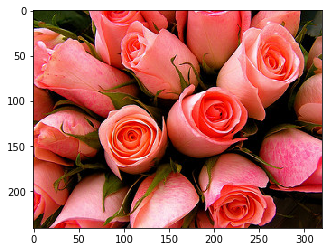

In [45]:
img = mpimg.imread('flowers/rose/118974357_0faa23cce9_n.jpg')
imgplot = plt.imshow(img)

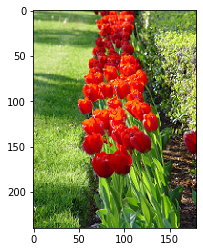

In [46]:
img = mpimg.imread('flowers/tulip/14957470_6a8c272a87_m.jpg')
imgplot = plt.imshow(img)

## Primer modelo CNN

Para este primer modelo se diseño una aquitecrua simple que tuviera resultados buenos aunque cun un tiempo de entrenamiento mas modesto. 

In [22]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', 
                        input_shape = (256,256,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),


    keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),


    keras.layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.Dense(5, activation = "softmax")
    
])

## Especificaciones de la arquitectura

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 96)        8

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [16]:
#Callbacks
cp_mejor_modelo = keras.callbacks.ModelCheckpoint("CNN_class_flowers.h5", save_best_only = True)
cp_early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [33]:
history = model.fit(train_set, epochs=50,
                   validation_data=val_set,
                     callbacks=[cp_mejor_modelo, cp_early_stopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 95 steps, validate for 41 steps
Epoch 1/50
95/95 [==============================] - 263s 3s/step - loss: 1.3723 - accuracy: 0.4055 - val_loss: 1.1497 - val_accuracy: 0.5320
Epoch 2/50
95/95 [==============================] - 237s 2s/step - loss: 1.1245 - accuracy: 0.5360 - val_loss: 1.0641 - val_accuracy: 0.5907
Epoch 3/50
95/95 [==============================] - 240s 3s/step - loss: 0.9903 - accuracy: 0.6129 - val_loss: 0.9901 - val_accuracy: 0.6116
Epoch 4/50
95/95 [==============================] - 237s 2s/step - loss: 0.9062 - accuracy: 0.6390 - val_loss: 0.9442 - val_accuracy: 0.6309
Epoch 5/50
95/95 [==============================] - 236s 2s/step - loss: 0.8304 - accuracy: 0.6747 - val_loss: 0.9530 - val_accuracy: 0.6525
Epoch 6/50
95/95 [==============================] - 237s 2s/step - loss: 0.7756 - accuracy: 0.7015 - val_loss: 0.9120 - val_accuracy: 0.6618
Epoch 7/50
95/95 [==============================] - 236s 2s/st

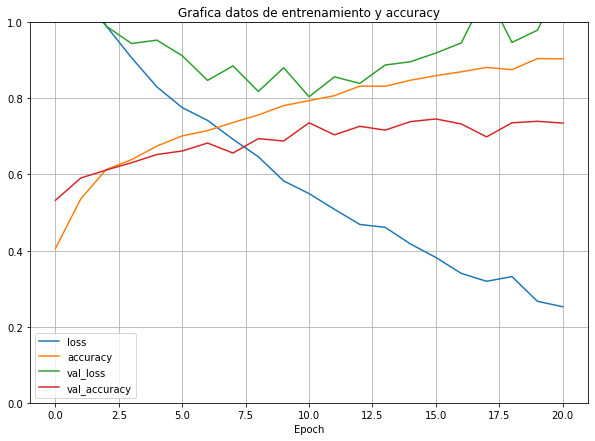

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel("Epoch")
plt.title("Grafica datos de entrenamiento y accuracy")
plt.show()

In [35]:
#Evaluacion del modelo

resultados = model.evaluate(val_set)
print("Accuracy del modelo entrenado: ", round(resultados[1]*100, 2), "%")

  ...
    to  
  ['...']
41/41 [==============================] - 34s 840ms/step - loss: 0.8044 - accuracy: 0.7359
Accuracy del modelo entrenado:  73.59 %


## Segundo Modelo CNN

La finalidad de este segundo modelo es mejorar los resultados del primero, principalmente agregando filtros en la tercera y cuarta capa convolucional.

In [29]:
model_CNN2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', 
                        input_shape = (256,256,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),


    keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),


    keras.layers.Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.Dense(5, activation = "softmax")
    
])

## Especificaciones de la arquitectura

In [30]:
model_CNN2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 32, 256)      

In [35]:
model_CNN2.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [36]:
#Callbacks
cp_mejor_modelo_2 = keras.callbacks.ModelCheckpoint("Model_CNN2_class_flowers.h5", save_best_only = True)
cp_early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [37]:
history = model_CNN2.fit(train_set, epochs=50,
                   validation_data=val_set,
                     callbacks=[cp_mejor_modelo_2, cp_early_stopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 95 steps, validate for 41 steps
Epoch 1/50
95/95 [==============================] - 268s 3s/step - loss: 1.3480 - accuracy: 0.4197 - val_loss: 1.1634 - val_accuracy: 0.5274
Epoch 2/50
95/95 [==============================] - 271s 3s/step - loss: 1.0559 - accuracy: 0.5783 - val_loss: 0.9469 - val_accuracy: 0.6286
Epoch 3/50
95/95 [==============================] - 275s 3s/step - loss: 0.9711 - accuracy: 0.6100 - val_loss: 0.9250 - val_accuracy: 0.6440
Epoch 4/50
95/95 [==============================] - 275s 3s/step - loss: 0.8783 - accuracy: 0.6565 - val_loss: 1.0251 - val_accuracy: 0.6178
Epoch 5/50
95/95 [==============================] - 278s 3s/step - loss: 0.8258 - accuracy: 0.6747 - val_loss: 0.9038 - val_accuracy: 0.6618
Epoch 6/50
95/95 [==============================] - 304s 3s/step - loss: 0.7726 - accuracy: 0.7028 - val_loss: 0.8890 - val_accuracy: 0.6687
Epoch 7/50
95/95 [==============================] - 264s 3s/st

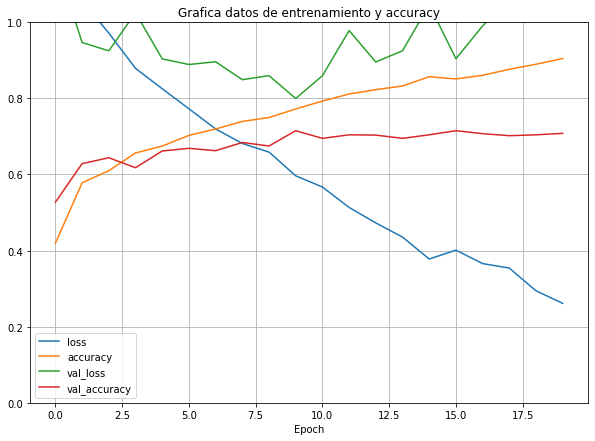

In [38]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel("Epoch")
plt.title("Grafica datos de entrenamiento y accuracy")
plt.show()


In [40]:
#Evaluacion del modelo

resultados = model_CNN2.evaluate(val_set)
print("Accuracy del modelo entrenado: ", round(resultados[1]*100, 2), "%")

  ...
    to  
  ['...']
41/41 [==============================] - 39s 957ms/step - loss: 0.7997 - accuracy: 0.7151
Accuracy del modelo entrenado:  71.51 %


# AlexNet

El tercer modelo se baso en la arquitectura especificada en el paper "ImageNet Classification with Deep Convolutional Neural Networks" por el autor Alex Krizhevsky, del cual recibe su nombre, la aquitectura del modelo se compone de la siguiente manera (se agrego Batch Normalization en cada capa): 

![title](alexnet.jpg)


Krizhevsky, Alex & Sutskever, Ilya & Hinton, Geoffrey. (2012). ImageNet Classification with Deep Convolutional Neural Networks. Neural Information Processing Systems. 25. 10.1145/3065386. 

https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

In [3]:
modelo_AlexNet = keras.models.Sequential([
    
    #Primera capa convolucional
    keras.layers.Conv2D(filters=96, input_shape = (256,256,3), kernel_size=(11,11), 
                        strides=(4,4), padding='valid', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    #Segunda capa convolucional
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    #Tercera capa convolucional
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),

    #Cuarta capa convolucional
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),

    #Quinta capa convolucional
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    #Transformacion a MLP
    keras.layers.Flatten(),
    
    #Primera capa
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.BatchNormalization(),
    
    #Dropout
    keras.layers.Dropout(0.5),

    #Segunda capa
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.BatchNormalization(),
    
    #Dropout
    keras.layers.Dropout(0.5),
    
    #Tercera capa
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.BatchNormalization(),

    #Output Layer
    keras.layers.Dense(5, activation = "softmax")
    
])

In [4]:
modelo_AlexNet.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=0.001), 
              metrics=['accuracy', tf.keras.metrics.Precision()])

In [5]:
modelo_AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 384)       8

In [6]:
#Callbacks
cp_mejor_modelo_AlexNet = keras.callbacks.ModelCheckpoint("CNN_AlexNet_flowers.h5", save_best_only = True)
cp_early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [7]:
history_AlexNet = modelo_AlexNet.fit(train_set, epochs=50,
                                 validation_data=val_set,
                                 callbacks=[cp_mejor_modelo_AlexNet, cp_early_stopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 95 steps, validate for 41 steps
Epoch 1/50
95/95 [==============================] - 278s 3s/step - loss: 1.9893 - accuracy: 0.3910 - precision: 0.4233 - val_loss: 6.1346 - val_accuracy: 0.3606 - val_precision: 0.3668
Epoch 2/50
95/95 [==============================] - 275s 3s/step - loss: 1.2711 - accuracy: 0.4934 - precision: 0.5658 - val_loss: 1.8318 - val_accuracy: 0.3683 - val_precision: 0.4004
Epoch 3/50
95/95 [==============================] - 273s 3s/step - loss: 1.1494 - accuracy: 0.5515 - precision: 0.6249 - val_loss: 1.7294 - val_accuracy: 0.4031 - val_precision: 0.4222
Epoch 4/50
95/95 [==============================] - 273s 3s/step - loss: 1.0467 - accuracy: 0.5928 - precision: 0.6536 - val_loss: 1.3777 - val_accuracy: 0.4718 - val_precision: 0.5020
Epoch 5/50
95/95 [==============================] - 275s 3s/step - loss: 1.0417 - accuracy: 0.5987 - precision: 0.6693 - val_loss: 1.2015 - val_accuracy: 0.5290 - val_p

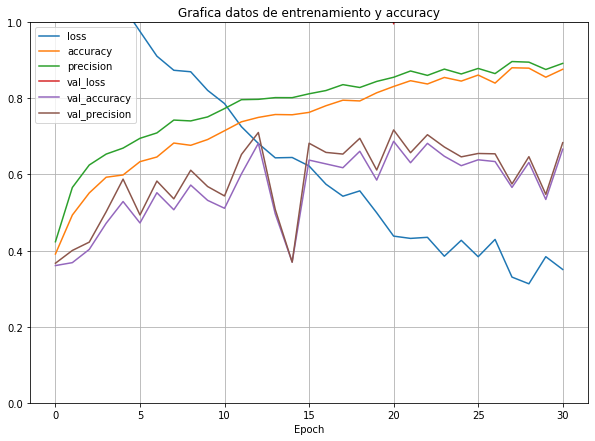

In [8]:
pd.DataFrame(history_AlexNet.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel("Epoch")
plt.title("Grafica datos de entrenamiento y accuracy")
plt.show()

In [9]:
#Evaluacion del modelo

resultados = modelo_AlexNet.evaluate(val_set)
print("Accuracy del modelo entrenado: ", round(resultados[1]*100, 2), "%")

  ...
    to  
  ['...']
41/41 [==============================] - 29s 697ms/step - loss: 0.9958 - accuracy: 0.6873 - precision: 0.7172
Accuracy del modelo entrenado:  68.73 %


## Conclusiones

Del modelo se trabajaron 3 diferentes arquitecturas para la predicción de flores, de todas ellas la mejor fue la primera seleccionada con un accuracy de 73.59 %, brinda por un margen estrecho mejores resultados que el segundo modelo con un 71.51 %, es interesante notar que ambos modelos entregan resultados realmente mejores que la arquitectura AlexNet con un accuracy de 68.73% y precision de 71.72%, la cual es mucho más compleja y lleva muchas horas de entrenamiento. 

Debo indicar que el modelo a pesar de no llegar al 80% es realmente muy bueno, ya que se obtienen resultados similares con un entrenamiento mucho menor, es importante agregar que se intentó entrenar la arquitectura VGG19, sin embargo, por las limitaciones de procesamiento llevaría más de 30 horas su entrenamiento, por ello se decidió un modelo más simple y lo más cercano a los resultados de esta arquitectura.  
